<a href="https://colab.research.google.com/github/xyksoar/UTS_ML2019_ID13130760/blob/master/1ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from google.colab import files
uploaded = files.upload()


Saving googleplaystore.csv to googleplaystore (1).csv


In [0]:
import re
import sys
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio
from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline
sns.set(style='darkgrid')
sns.set_palette('PuBuGn_d')

In [0]:
df = pd.read_csv('googleplaystore.csv')


In [131]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [132]:
df = df.drop_duplicates(subset=['App'], keep = 'first')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [133]:
print(df['Category'].unique())

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']


In [0]:
df = df[df.Category != '1.9']

In [135]:
df_catr = df.groupby('Category').count()['App'].sort_values(ascending = False).reset_index()
data = [go.Pie(
            values=df_catr['App'],
            labels=df_catr['Category'],
)]
layout = go.Layout(
    title = 'Category Distribution in App Store', 
)
fig = go.Figure(data = data , layout = layout)
iplot(fig, filename='Pie')

In [136]:
df_category = df.groupby('Category').count()['App'].reset_index()
df_category

,Category,App
0,ART_AND_DESIGN,64
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,222
4,BUSINESS,420
5,COMICS,56
6,COMMUNICATION,315
7,DATING,171
8,EDUCATION,119
9,ENTERTAINMENT,102


In [137]:
print(df['Rating'].isna().sum())
df['Rating'].mean()

1463


4.173243045387998

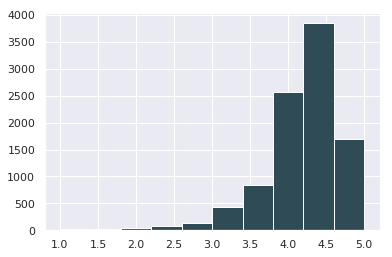

In [138]:
#fill the null values with the mean 
df['Rating'] = df.groupby('Category').transform(lambda x: x.fillna(x.mean()))['Rating']
df['Rating'].hist()
plt.show()

In [139]:
df.Rating.describe()

count    9659.000000
mean        4.172230
std         0.495593
min         1.000000
25%         4.000000
50%         4.200000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

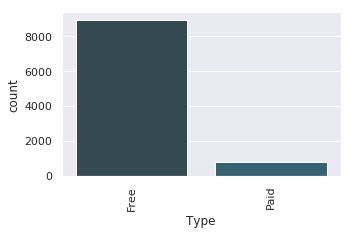

In [140]:
plt.figure(figsize=(5,3))
fig = sns.countplot(x=df['Type'])
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show(fig)

In [155]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

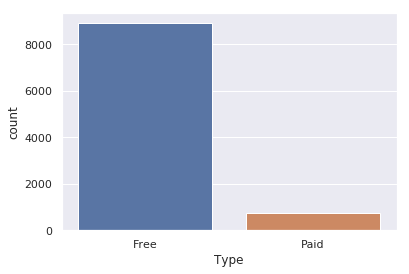

In [156]:
df.drop(df[df['Type'].isna()].index, inplace = True)
sns.set(style="darkgrid")
sns.countplot(x="Type", data = df)
plt.show()

In [157]:
df.Type.describe()

count     9658
unique       2
top       Free
freq      8902
Name: Type, dtype: object

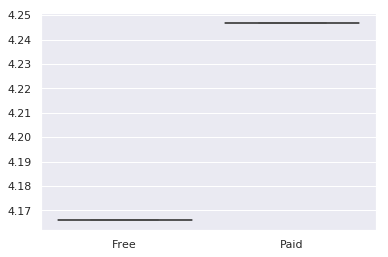

In [158]:
free_R=df[df.Type=='Free'].Rating.mean()
paid_R=df[df.Type!='Free'].Rating.mean()

sns.boxplot(x=['Free','Paid'],y=[free_R,paid_R])

In [159]:
df['Reviews'].isna().sum()
df['Reviews'] = pd.to_numeric(df['Reviews'])
df['Reviews'].describe()

count    9.658000e+03
mean     2.166150e+05
std      1.831413e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.670000e+02
75%      2.940800e+04
max      7.815831e+07
Name: Reviews, dtype: float64

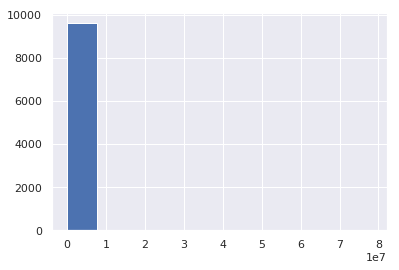

In [160]:
df['Reviews'].hist()

In [161]:
df[df['Reviews'] >= 30000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
1670,Clash of Clans,GAME,4.6,44891723,98M,"100,000,000+",Free,0,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,Varies with device,"1,000,000,000+",Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
4005,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,Varies with device,"500,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device


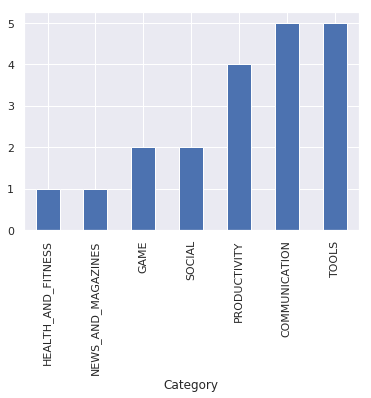

In [162]:
top_installed = df.sort_values(by = ['Installs'], ascending = False)[:20]
top_installed.groupby('Category')['App'].count().sort_values().plot.bar()

In [163]:
df_rating = df.groupby('Content Rating').count()['App'].reset_index()
df_rating

,Content Rating,App
0,Adults only 18+,3
1,Everyone,7903
2,Everyone 10+,321
3,Mature 17+,393
4,Teen,1036
5,Unrated,2


In [164]:
data = [go.Pie(
            values=df_rating['App'],
            labels=df_rating['Content Rating'],
#             orientation = 'h'
)]
layout = go.Layout(
    title = 'Number of Apps in different Content Rating', 
)
fig = go.Figure(data = data , layout = layout)
iplot(fig, filename='Pie')

App               False
Category          False
Rating            False
Reviews           False
Size              False
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

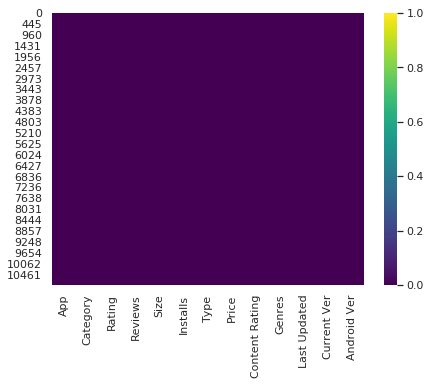

In [165]:
plt.figure(figsize=(7, 5))
sns.heatmap(df.isnull(), cmap='viridis')
df.isnull().any()

In [0]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [0]:

df['Rating'] = df['Rating'].fillna(df['Rating'].median())


replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
	df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].median())

In [0]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [0]:
df = df[pd.notnull(df['Last Updated'])]
df = df[pd.notnull(df['Content Rating'])]

In [0]:
le = preprocessing.LabelEncoder()
df['App'] = le.fit_transform(df['App'])

In [0]:
# Category
category_list = df['Category'].unique().tolist() 
category_list = ['cat_' + word for word in category_list]
df = pd.concat([df, pd.get_dummies(df['Category'], prefix='cat')], axis=1)

In [0]:
# Genres
le = preprocessing.LabelEncoder()
df['Genres'] = le.fit_transform(df['Genres'])
# Content Rating
le = preprocessing.LabelEncoder()
df['Content Rating'] = le.fit_transform(df['Content Rating'])
# Price
df['Price'] = df['Price'].apply(lambda x : x.strip('$'))
# Installs
df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
# Type
df['Type'] = pd.get_dummies(df['Type'])

In [0]:
# Last Updated
df['Last Updated'] = df['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x, '%B %d, %Y').timetuple()))
k_indices = df['Size'].loc[df['Size'].str.contains('k')].index.tolist()
converter = pd.DataFrame(df.loc[k_indices, 'Size'].apply(lambda x: x.strip('k')).astype(float).apply(lambda x: x / 1024).apply(lambda x: round(x, 3)).astype(str))
df.loc[k_indices,'Size'] = converter

In [0]:
# Size 
df['Size'] = df['Size'].apply(lambda x: x.strip('M'))
df[df['Size'] == 'Varies with device'] = 0
df['Size'] = df['Size'].astype(float)

In [0]:

features = ['App', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver']
features.extend(category_list)
X = df[features]
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

# KNN

In [0]:
model = KNeighborsRegressor(n_neighbors=15)
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                    weights='uniform')

In [0]:
accuracy = model.score(X_test,y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 90.41%'

In [0]:
# Try different numbers of n_estimators - this will take a minute or so
n_neighbors = np.arange(1, 20, 1)
scores = []
for n in n_neighbors:
    model.set_params(n_neighbors=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

# Random Forest Model

[(10, 0.9302032047384735),
 (20, 0.934754514195339),
 (30, 0.9356035675748298),
 (40, 0.9357078254307268),
 (50, 0.9379121272759336),
 (60, 0.9369655509300219),
 (70, 0.9373553859825472),
 (80, 0.937026546801046),
 (90, 0.9380970205434043),
 (100, 0.9370615893623435),
 (110, 0.9374134359634738),
 (120, 0.9386429760773053),
 (130, 0.9377753518080816),
 (140, 0.9377598327234196),
 (150, 0.9382167021459529),
 (160, 0.9386002788583314),
 (170, 0.937881778769546),
 (180, 0.938407835115125),
 (190, 0.9382982779540647)]

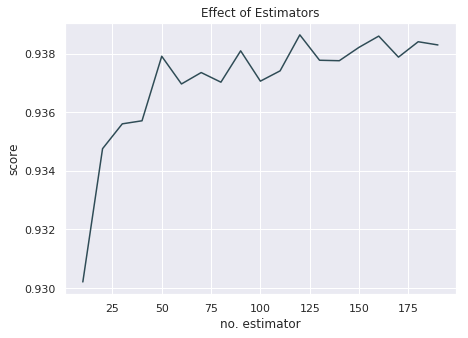

In [0]:
model = RandomForestRegressor(n_jobs=-1)
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure(figsize=(7, 5))
plt.title("Effect of Estimators")
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
results = list(zip(estimators,scores))
results

In [0]:
predictions = model.predict(X_test)
'Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions)

('Mean Absolute Error:', 0.24187453874538764)

In [0]:
'Mean Squared Error:', metrics.mean_squared_error(y_test, predictions)

('Mean Squared Error:', 0.16099663705778333)

In [0]:
'Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))

('Root Mean Squared Error:', 0.4012438623303581)

# Correlation

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr,spearmanr

[[0.44045016 0.16789692 0.88410078 0.01297706 0.23235988 0.76991567
  0.2974266  0.74678959 0.29287027 0.30388578 0.84216909 0.02381362
  0.0853103 ]
 [0.05944908 0.99169598 0.26482467 0.78240938 0.32429171 0.05560969
  0.77155706 0.11847132 0.88734182 0.97093095 0.15984936 0.21271619
  0.27854483]
 [0.26352801 0.83836315 0.97473291 0.75955593 0.58108244 0.14795376
  0.40338156 0.6572631  0.09598442 0.24951004 0.91935246 0.15587785
  0.01952549]
 [0.14782665 0.3212341  0.92547904 0.08480428 0.55871148 0.23798878
  0.07307093 0.81749429 0.03175598 0.93898587 0.13263693 0.35699009
  0.65769446]
 [0.8490674  0.23757861 0.25490439 0.25014377 0.76952013 0.65857639
  0.59317686 0.24941051 0.79062548 0.81318665 0.55089345 0.26453705
  0.08542044]
 [0.21169466 0.20196383 0.76238545 0.93309603 0.80268417 0.36275545
  0.58434923 0.09082981 0.60006717 0.7153921  0.77240072 0.03555881
  0.89483055]
 [0.32116608 0.88356316 0.04836622 0.62969879 0.46325459 0.19700783
  0.91972193 0.86106486 0.025922

ValueError: ignored

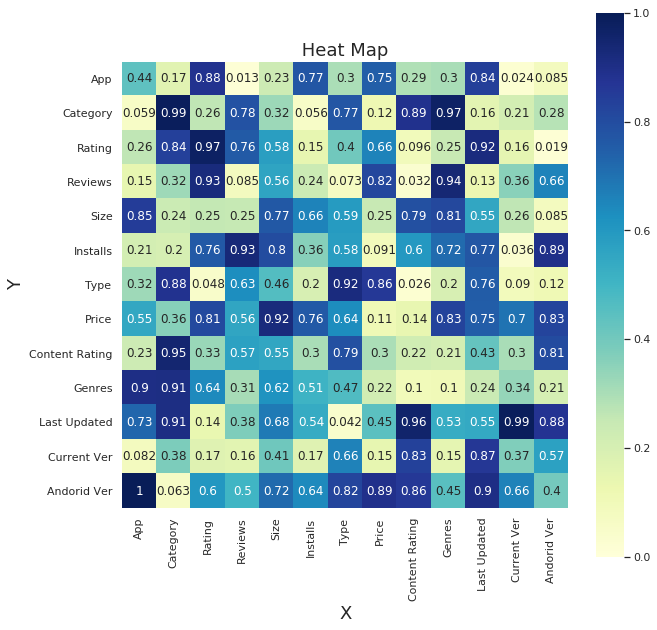

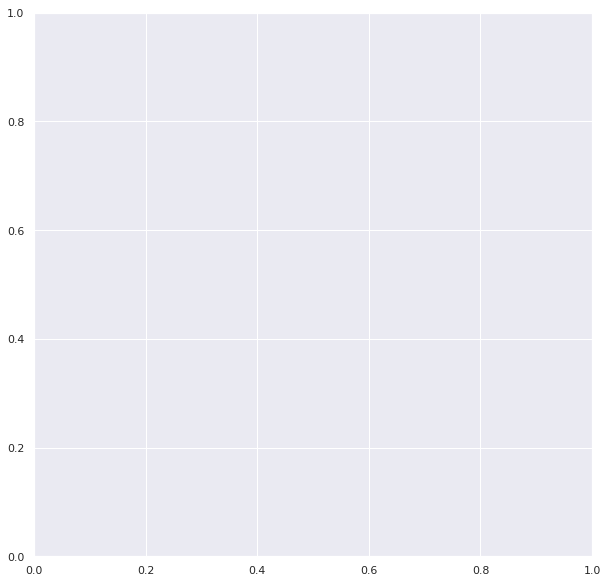

In [0]:
def randomPlot():
    '''
    构造随机数矩阵来绘制热力图
    '''
    data=np.random.rand(13,13)
    print(data)
    fig,ax=plt.subplots(figsize=(10,10))
    key_list=['App','Category','Rating','Reviews','Size','Installs','Type','Price','Content Rating','Genres','Last Updated','Current Ver','Andorid Ver']
    sns.heatmap(pd.DataFrame(np.round(data,4),columns=key_list,index=key_list),annot=True,vmax=1,vmin=0,xticklabels=True, 
                             yticklabels=True,square=True,cmap="YlGnBu")
    ax.set_title(' Heat Map ', fontsize=18)
    ax.set_ylabel('Y', fontsize=18)
    ax.set_xlabel('X', fontsize=18)
    plt.savefig('Random.png')
 
 
def dataPlot():
    '''
    基于相关性系数计算结果来绘制
    '''
    data1=[[1.0, 0.679138216972867, 0.8723347117585479, 0.8678591195124671, 0.9091565423610072, -0.681888271075189, -0.7228630059512009, -0.681888271075189], [0.679138216972867, 1.0, 0.7808137626700863, 0.45749648218056993, 0.5348626411851899, -0.44326149230111495, -0.39558814315535173, -0.44326149230111495], [0.8723347117585479, 0.7808137626700863, 1.0, 0.7020628568851344, 0.7658545326255977, -0.7217424383082518, -0.5875065812285509, -0.7217424383082518], [0.8678591195124671, 0.45749648218056993, 0.7020628568851344, 1.0, 0.9903366506522474, -0.5874500887255807, -0.8382341966002466, -0.5874500887255807], [0.9091565423610072, 0.5348626411851899, 0.7658545326255977, 0.9903366506522474, 1.0, -0.6439505593700681, -0.8244259230387567, -0.6439505593700681], [-0.681888271075189, -0.44326149230111495, -0.7217424383082518, -0.5874500887255807, -0.6439505593700681, 1.0, 0.4821038714558963, 1.0], [-0.7228630059512009, -0.39558814315535173, -0.5875065812285509, -0.8382341966002466, -0.8244259230387567, 0.4821038714558963, 1.0, 0.4821038714558963], [-0.681888271075189, -0.44326149230111495, -0.7217424383082518, -0.5874500887255807, -0.6439505593700681, 1.0, 0.4821038714558963, 1.0]]
    data2=[[0.9999999999999999, 0.8345554576233073, 0.9243854856819417, 0.9330027648545496, 0.9482209505391218, -0.6482501837911674, -0.8818546914603946, -0.6482501837911674], [0.8345554576233073, 0.9999999999999999, 0.9003585423988755, 0.7649830893396171, 0.7979521001324441, -0.4691190784521079, -0.6480284658216039, -0.4691190784521079], [0.9243854856819417, 0.9003585423988756, 1.0, 0.8506386730833658, 0.8830994621736679, -0.7006298478257242, -0.7676395373967932, -0.7006298478257242], [0.9330027648545496, 0.7649830893396171, 0.8506386730833659, 0.9999999999999999, 0.9951726440650351, -0.5278605167290854, -0.9273089460158745, -0.5278605167290854], [0.9482209505391219, 0.7979521001324442, 0.8830994621736679, 0.9951726440650353, 1.0, -0.5724194583833783, -0.9112198965249181, -0.5724194583833783], [-0.6482501837911674, -0.46911907845210793, -0.7006298478257242, -0.5278605167290855, -0.5724194583833783, 1.0, 0.49515922475047763, 1.0], [-0.8818546914603947, -0.6480284658216039, -0.7676395373967932, -0.9273089460158744, -0.9112198965249181, 0.49515922475047763, 1.0, 0.49515922475047763], [-0.6482501837911674, -0.46911907845210793, -0.7006298478257242, -0.5278605167290855, -0.5724194583833783, 1.0, 0.49515922475047763, 1.0]]
    data3=[[1.0, 0.6447733742285494, 0.7648449086941359, 0.7781871747188993, 0.8077705036447606, -0.45314582645069557, -0.7063398069618333, -0.45314582645069557], [0.6447733742285494, 1.0, 0.723107089412363, 0.5724058545087037, 0.6071562414937144, -0.3151362329600627, -0.47203186715609546, -0.3151362329600627], [0.7648449086941359, 0.7231070894123629, 1.0, 0.6636168802979515, 0.7036503531839524, -0.5094145396347782, -0.5801992046091554, -0.5094145396347782], [0.7781871747188993, 0.5724058545087037, 0.6636168802979514, 1.0, 0.9417388451103401, -0.35110754201106087, -0.818036667286979, -0.35110754201106087], [0.8077705036447606, 0.6071562414937144, 0.7036503531839524, 0.9417388451103401, 1.0, -0.3871446641295609, -0.7851151107221745, -0.3871446641295609], [-0.45314582645069557, -0.3151362329600627, -0.5094145396347782, -0.35110754201106087, -0.3871446641295609, 1.0, 0.331222719795913, 1.0], [-0.7063398069618333, -0.4720318671560954, -0.5801992046091554, -0.818036667286979, -0.7851151107221744, 0.331222719795913, 1.0, 0.331222719795913], [-0.45314582645069557, -0.3151362329600627, -0.5094145396347782, -0.35110754201106087, -0.3871446641295609, 1.0, 0.331222719795913, 1.0]]
    data1,data2,data3=np.array(data1),np.array(data2),np.array(data3)
    fig,ax=plt.subplots(figsize=(10,10))
    key_list=['App','Category','Rating','Reviews','Size','Installs','Type','Price','Content Rating','Genres','Last Updated','Current Ver','Andorid Ver']
    sns.heatmap(pd.DataFrame(np.round(data1,4),columns=key_list,index=key_list),annot=True,vmax=1,vmin=0,xticklabels=True,
                             yticklabels=True,square=True,cmap="YlGnBu")
    ax.set_title(' Heat Map ', fontsize=18)
    ax.set_ylabel('Y', fontsize=18)
    ax.set_xlabel('X', fontsize=18)
    plt.savefig('data1.png')
 
 
if __name__=='__main__':
    randomPlot()
    dataPlot()